In [240]:
#neccessary imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import numpy as np
import scipy as sp
import qmcpy as qp
from scipy import stats
import sympy as sy
import sympy.stats
from scipy.stats import norm
import pickle

#not sure
import random
random.seed(100)





$Y = f(X_1, X_2, X_3) = X_1 + X_2 + X_3$ for $X_j \sim \mathcal{U}(0, 2^{j-1})$
\
\
$Y = \mathcal{U}([0,1]) + 2\mathcal{U}([0,1]) + 4\mathcal{U}([0,1])$
\
\
$\rho_{\text{true}}(y) = \text{big piecewise function of lines, parabolas}$
\
\
$\rho(y | \mathcal{G}_{-k}) = \text{piecewise between constant and 0}$


In [64]:
#EXAMPLE 1: weighted sum of uniforms

def theFunc(u):
    return u[0] + 2*u[1] + 4*u[2]

def truePDF(y):
    n = len(y)
    output = [0.0] * n
    for i in range(n):
        if y[i] < 1 and y[i] > 0:
            output[i] = (1 / 16) * y[i]**2
        elif y[i] < 2 and y[i] > 1:
            output[i] = (1 / 16) + (1 / 8) * (y[i] - 1)
        elif y[i] < 3 and y[i] > 2:
            output[i] = (3 / 16) + (3 / 8) * (y[i] - 2) - (1 / 16) * (y[i]**2 - 4)
        elif y[i] < 4 and y[i] > 3:
            output[i] = 1/4
        elif y[i] < 5 and y[i] > 4:
            output[i] = (3 / 16) + (1 / 16) * (1 - (y[i] - 4)**2)
        elif y[i] < 6 and y[i] > 5:
            output[i] = (1 / 16) + (1 / 8) * (6 - y[i])
        elif y[i] < 7 and y[i] > 6:
            output[i] = (3 / 8) * (7 - y[i]) - (1 / 16) * (9 - (y[i] - 4)**2)
        else:
            output[i] = 0
    return output

def conditionalDensity1(y, x):
    test = y - x[1] - x[2]
    for j in range(len(test)):
        if test[j] > 0 and test[j] < 1:
            test[j] = 1
        else:
            test[j] = 0
    return test

def conditionalDensity2(y, x):
    test = y - x[0] - x[2]
    for j in range(len(test)):
        if test[j] > 0 and test[j] < 2:
            test[j] = 1/2
        else:
            test[j] = 0
    return test

def conditionalDensity3(y, x):
    test = y - x[0] - x[1]
    for j in range(len(test)):
        if test[j] > 0 and test[j] < 4:
            test[j] = 1/4
        else:
            test[j] = 0
    return test

#inverseCDFs expect only between (0, 1)
def inverseCDF1(y):
    return y

def inverseCDF2(y):
    return 2*y

def inverseCDF3(y):
    return 4*y


inverseCDFs = [inverseCDF1, inverseCDF2, inverseCDF3]
conditionalDensities = [conditionalDensity1, conditionalDensity2, conditionalDensity3]
start, end, nEval = 0, 7, 100
evalPoints = np.linspace(start, end, nEval)
Q = 25.5323059457 #take bandwidth = (Q / n) **(1/5) generally


$Y = f(X_1, X_2, X_3, X_4) = \frac{1}{\alpha}(\sum_{i=1}^4 X_i) = \frac{1}{\alpha}(\sum_{i=1}^4 w_i Z_i)$ for $\alpha^2 = \sum_{i=1}^4 w_i^2$
\
\
$\rho_{\text{true}}(y) = \phi(x)$
\
\
$\rho(y | \mathcal{G}_{-k}) = \frac{\alpha}{w_k}\phi(\frac{1}{w_k}(\alpha y - \sum_{i\neq k}^4 X_i))$

In [68]:
#EXAMPLE 2: weighted sum of normals

weights = np.array([1, 0.5, 0.25, 0.125])
alpha = np.sqrt(np.sum(weights * weights))

def theFunc(u):
    return np.sum((weights / alpha) * norm.ppf(u))

def truePDF(y):
    return norm.pdf(y)

def conditionalDensity1(y, x):
    return (alpha / weights[0]) * norm.pdf((1 / weights[0]) * (alpha*y - (np.sum(x, 0) - x[0])))

def conditionalDensity2(y, x):
    return (alpha / weights[1]) * norm.pdf((1 / weights[1]) * (alpha*y - (np.sum(x, 0) - x[1])))

def conditionalDensity3(y, x):
    return (alpha / weights[2]) * norm.pdf((1 / weights[2]) * (alpha*y - (np.sum(x, 0) - x[2])))

def conditionalDensity4(y, x):
    return (alpha / weights[3]) * norm.pdf((1 / weights[3]) * (alpha*y - (np.sum(x, 0) - x[3])))

#inverseCDFs expect only between (0, 1)
def inverseCDF1(y):
    return weights[0] * norm.ppf(y)

def inverseCDF2(y):
    return weights[1] * norm.ppf(y)

def inverseCDF3(y):
    return weights[2] * norm.ppf(y)

def inverseCDF4(y):
    return weights[3] * norm.ppf(y)


inverseCDFs = [inverseCDF1, inverseCDF2, inverseCDF3, inverseCDF4]
conditionalDensities = [conditionalDensity1, conditionalDensity2, conditionalDensity3, conditionalDensity4]
start, end, nEval = -3, 3, 100
evalPoints = np.linspace(start, end, nEval)
Q = 7.56053742316 #take bandwidth = (Q / n) **(1/5) generally


$Y = f(X_1, X_2, X_3) = X_1X_2X_3$ for $X_j \sim \mathcal{U}(0, 2^{j-1})$
\
\
$\rho_\text{true}(y) = \frac{1}{16}\ln(\frac{y}{8})^2$
\
\
$\rho(y \;|\; \mathcal{G}_{-k}) = (\Pi_{-k})^{-1}$ 

In [120]:
#EXAMPLE 3: weighted product of uniforms


def theFunc(u):
    return 8*u[0]*u[1]*u[2]

def truePDF(y):
    output = [0] * len(y)
    for j in range(len(y)):
        if y[j] > 8 or y[j] < 0:
            output[j] = 0
        else:
            output[j] = (1/16) * (np.log(y[j] / 8))**2
    return output

def conditionalDensity1(y, x):
    test = y / (x[1]*x[2])
    for j in range(len(test)):
        if test[j] > 1 or test[j] < 0:
            test[j]=0
    return test / y

def conditionalDensity2(y, x):
    test = y / (x[0]*x[2])
    for j in range(len(test)):
        if test[j] > 2 or test[j] < 0:
            test[j] = 0
    return test / (2*y)

def conditionalDensity3(y, x):
    test = y / (x[0]*x[1])
    for j in range(len(test)):
        if test[j] > 4 or test[j] < 0:
            test[j] = 0
    return test / (4*y)

def inverseCDF1(y):
    return y

def inverseCDF2(y):
    return 2*y

def inverseCDF3(y):
    return 4*y

start, end = 0.01, 8
nEval = 100
evalPoints = np.linspace(start, end, nEval)
inverseCDFs = [inverseCDF1, inverseCDF2, inverseCDF3]
conditionalDensities = [conditionalDensity1, conditionalDensity2, conditionalDensity3]
Q = 0.00000565787743961

    


In [241]:
#EXAMPLE 4: Displacement of a cantilever beam



mu = np.array([2.9e+07, 500, 1000])
sigma = np.array([1.45e+06, 100, 100])

l = 100
w = 4
t = 2
kappa = 4*l**3 / (w*t)

def theFunc(u):
    term1 = kappa / (sigma[0] * norm.ppf(u[0]) + mu[0])
    term2 = np.sqrt(((sigma[1] * norm.ppf(u[1]) + mu[1])**2) / (w**4) + ((sigma[2] * norm.ppf(u[2]) + mu[2])**2) / (t**4))
    return term1 * term2


def truePDF(y):
    raise Exception("there is no known truePDF!")
    return True

def conditionalDensity1(y, x):
    def W1(y, x):
        return (kappa / y) * np.sqrt(x[1]**2 / (w**4) + x[2]**2 / (t**4))
    return (1 / (y * sigma[0])) * W1(y,x) * norm.pdf((W1(y, x) - mu[0]) / sigma[0])



def conditionalDensity2(y, x):
    n = len(y)
    output = np.array([0.0] * n)
    def W2(y, x):
        return (w**4) * ((y * x[0] / kappa)**2 - (x[2]**2 / (t**4)))
    
    for i in range(n):
        if W2(y[i], x) <= 0:
            output[i] = 0
        else:
            def sqrtW2(y,x):
                return np.sqrt(W2(y,x))
            
            numer = norm.pdf((sqrtW2(y[i],x) - mu[1]) / sigma[1]) + norm.pdf(-(sqrtW2(y[i],x) + mu[1]) / sigma[1])
            denom = (sigma[1]*sqrtW2(y[i], x)) / ((w**4)*y[i]*(x[0] / kappa)**2)
            output[i] = numer / denom
    return output



def conditionalDensity3(y, x):
    n = len(y)
    output = np.array([0.0] * n)
    def W3(y, x):
        return (t**4) * ((y * x[0] / kappa)**2 - (x[1]**2 / (w**4)))
    
    for i in range(n):
        if W3(y[i], x) <= 0:
            output[i] = 0
        else:
            def sqrtW3(y,x):
                return np.sqrt(W3(y,x))
            
            numer = norm.pdf((sqrtW3(y[i],x) - mu[2]) / sigma[2]) + norm.pdf(-(sqrtW3(y[i],x) + mu[2]) / sigma[2])
            denom = (sigma[2]*sqrtW3(y[i], x)) / ((t**4)*y[i]*(x[0] / kappa)**2)
            output[i] = numer / denom
    return output


#inverseCDFs expect only between (0, 1)
def inverseCDF1(y):
    return sigma[0]*norm.ppf(y) + mu[0]

def inverseCDF2(y):
    return sigma[1]*norm.ppf(y) + mu[1]

def inverseCDF3(y):
    return sigma[2]*norm.ppf(y) + mu[2]


inverseCDFs = [inverseCDF1, inverseCDF2, inverseCDF3]
conditionalDensities = [conditionalDensity1, conditionalDensity2, conditionalDensity3]
start, end, nEval = 3.1707, 5.6675, 100
evalPoints = np.linspace(start, end, nEval)
Q = 0.005 #take bandwidth = (Q / n) **(1/5) generally


In [242]:
def kernelDensityEstimator(y, pointSet, bandwidth): 
    n = len(pointSet)
    def kernel(z): #gaussian kernel
         return np.exp(-z**2) / math.sqrt(math.pi)
    sum = 0
    for i in range(n):
        sum += (1 / (n*bandwidth)) * kernel((y - theFunc(pointSet[i])) / bandwidth)
    return sum

def conditionalEstimator(y, conditionalDensity, realizations):
    output = 0
    for j in range(realizations[:, 0].size):
        output += conditionalDensity(y, realizations[j]) / realizations[:, 0].size
    return output

In [243]:
def getEvaluatedPoints(pointSetType, n, method, conditionalDensity, bandwidth, inverseCDFs, evalPoints):
    dimension = len(inverseCDFs)
    if n <= 0:
        raise Exception("n must be a positive integer")
    
    if pointSetType == "MC":
        pointSet = qp.IIDStdUniform(dimension).gen_samples(n)
    elif pointSetType == "Sobol":
        pointSet = qp.Sobol(dimension).gen_samples(n)
    else:
        raise Exception("Currently supported pointSetTypes are MC and Sobol")
    if method == "KDE":
        evaluatedPoints = kernelDensityEstimator(evalPoints, pointSet, bandwidth)
    elif method == "conditional":
        realizations = np.array([[0.0] * dimension] * n)
        for i in range(dimension):
            realizations[:, i] = inverseCDFs[i](pointSet[:, i])
        evaluatedPoints = conditionalEstimator(evalPoints, conditionalDensity, realizations)
    else:
        raise Exception("Valid methods are KDE or conditional")
    return evaluatedPoints

def getTrueError(evaluatedPoints, evalPoints):
    nPoints = len(evalPoints)
    estimatedError = ((end - start) / nPoints) * np.sum((evaluatedPoints - truePDF(evalPoints))**2)
    return estimatedError

def averageErrorLog(pointSetType, n, method, conditionalDensity, bandwidth, inverseCDFs, averageAcross, evalPoints):
    sum = 0
    for i in range(averageAcross):
        evaluatedPoints = getEvaluatedPoints(pointSetType, n, method, conditionalDensity, bandwidth, inverseCDFs, evalPoints)
        sum += (1 / averageAcross) * getTrueError(evaluatedPoints, evalPoints)
    return -np.log10(sum)

In [244]:
def generateSeparatePlots(n, densitiesToPlot, wantTrue, wantSeparate):
    numConditional = len(densitiesToPlot)
    dimension = len(inverseCDFs)

    evaluatedPoints = [0.0] * (numConditional + 1)
    for i in range(numConditional):
        evaluatedPoints[i] = getEvaluatedPoints('Sobol', n, 'conditional', densitiesToPlot[i], "no bandwidth", inverseCDFs, evalPoints)
    

    bandwidth = (Q / n) ** (1/5)
    sobolPoints = qp.Sobol(dimension).gen_samples(n)
    evaluatedPoints[numConditional] = kernelDensityEstimator(evalPoints, sobolPoints, bandwidth)
    
    mpl.style.use('seaborn-v0_8-darkgrid')
    
    if wantSeparate == True:
        fig, ax = plt.subplots(1, numConditional + 1, figsize = (24, 6))
        for i in range(numConditional + 1):
            if i < numConditional:
                name = densitiesToPlot[i].__name__
            else:
                name = "KDE"
            ax[i].plot(evalPoints, evaluatedPoints[i], label = f"{name}", color = "red")
            if wantTrue == True:
                truePoints = truePDF(evalPoints)
                ax[i].plot(evalPoints, truePoints, label = "truePDF", color = "green")
            ax[i].legend() 

    else:
        for i in range(numConditional + 1):
            if i < numConditional:
                name = densitiesToPlot[i].__name__
            else:
                name = "KDE"
            plt.plot(evalPoints, evaluatedPoints[i], "--",label = f"{name}")
        if wantTrue == True:
            truePoints = truePDF(evalPoints)
            plt.plot(evalPoints, truePoints, label = "truePDF", color = "green")
        plt.legend()
        plt.figure(figsize = (16,12))



In [245]:
def printSaveErrorTable(methods, pointSetTypes, conditionalDensities, start, stop, increment, averageOver, Qval, evalPoints):
    db = {}
    xvals = np.array(range(start, stop, increment)) * np.log10(2)
    for method in methods:
        if method == "conditional":
            for conditionalDensity in conditionalDensities:
                for pointSetType in pointSetTypes:
                    output = []
                    for exp in range(start, stop, increment):
                        output.append(averageErrorLog(pointSetType, 2**exp, method, conditionalDensity, "N/A bandwidth", inverseCDFs, averageOver, evalPoints))
                    print(pointSetType, method, conditionalDensity.__name__, output)
                    nu = stats.linregress(xvals, output).slope
                    db[pointSetType, method, conditionalDensity.__name__] = (output, nu)
        elif method == "KDE":
            for pointSetType in pointSetTypes:
                output = []
                for exp in range(start, stop, increment):
                    n = 2**exp
                    output.append(averageErrorLog(pointSetType, n, method, "no conditional density", (Qval / n)**(1/5), inverseCDFs, averageOver, evalPoints))
                print(pointSetType, method, output)
                nu = stats.linregress(xvals, output).slope
                db[pointSetType, method] = (output, nu)
    return db

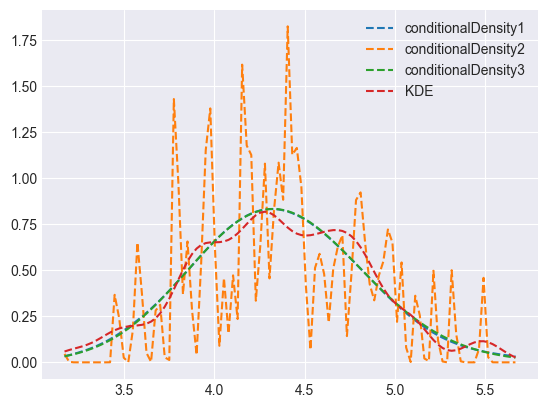

<Figure size 1600x1200 with 0 Axes>

In [246]:
generateSeparatePlots(2**6, [conditionalDensity1, conditionalDensity2, conditionalDensity3], False, False)

In [110]:
def calculateEstimatedMISE(samplePoints):
    predictedVarVec = np.array([0.0] * nEval)
    for j in range(nEval):
        predictedVarVec[j] = np.var(samplePoints[:,j])
    return ((end - start) / nEval) * np.sum(predictedVarVec)

def generatePointsforCalculateEstimatedMISE(pointSetType, n, method, conditionalDensity, bandwidth, inverseCDFs, evalPoints, nr):
    samplePoints = np.array([[0.0] * nEval] * nr)
    for i in range(nr):
        samplePoints[i] = getEvaluatedPoints(pointSetType, n, method, conditionalDensity, bandwidth, inverseCDFs, evalPoints)
    return samplePoints



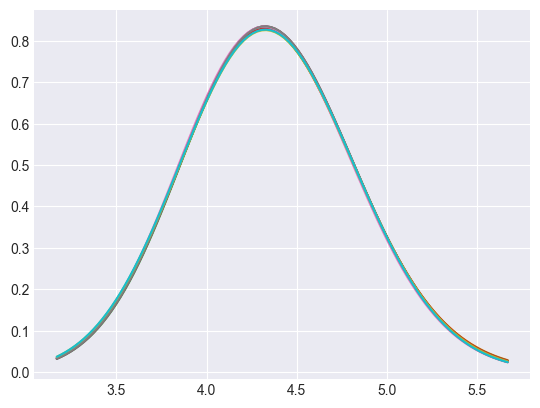

In [281]:
nr = 10
for i in range(nr):
    plt.plot(evalPoints, generatePointsforCalculateEstimatedMISE('Sobol', 2**5, "conditional", conditionalDensity3, "no bandwidth", inverseCDFs, evalPoints, nr)[i])

(array([ 2.,  1.,  4.,  6., 13., 27., 39., 25., 20., 13.]),
 array([-7.19626200e-04, -6.16011493e-04, -5.12396785e-04, -4.08782078e-04,
        -3.05167370e-04, -2.01552663e-04, -9.79379551e-05,  5.67675241e-06,
         1.09291460e-04,  2.12906167e-04,  3.16520875e-04]),
 <BarContainer object of 10 artists>)

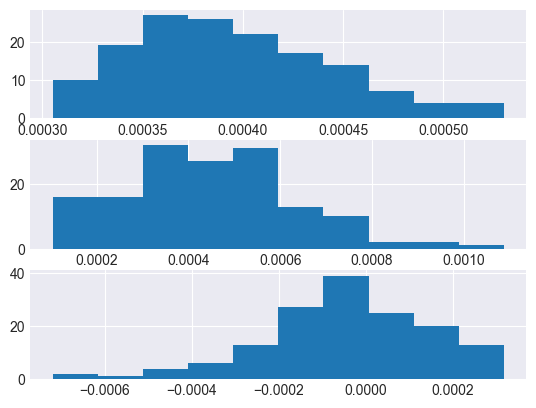

In [120]:
testing = 150
list1 = np.array([0.0] * testing)
list2 = np.array([0.0] * testing)
nr = 10
for i in range(testing):
    list1[i] = calculateEstimatedMISE(generatePointsforCalculateEstimatedMISE('Sobol', 2**8, "conditional", conditionalDensity3, "no bandwidth", inverseCDFs, evalPoints, nr))
    list2[i] = getTrueError(getEvaluatedPoints('Sobol', 2**8, "conditional", conditionalDensity3, "no bandwidth", inverseCDFs, evalPoints), evalPoints)

fig, ax = plt.subplots(3)
ax[0].hist(list1)
ax[1].hist(list2)
ax[2].hist(list1 - list2)



In [25]:
dbFromGithub = {
    ('MC', 'conditional', 'conditionalDensity1') : ([3.1232477800396206, 3.8096834805839217, 4.2891843930376, 4.843869774778309, 5.526437006878188, 6.209478583144208], 1.0030372046729858),
    ('Sobol', 'conditional', 'conditionalDensity1') : ([4.399018936933285, 5.373626582282403, 6.143926972187371, 7.016837233083066, 8.225135407609418, 9.006651742476551], 1.5406913042471198),
    ('MC', 'conditional', 'conditionalDensity2') : ([3.625000985625958, 4.172391330853257, 4.668379291096744, 5.372872963626329, 5.956312031592263, 6.497775034830397], 0.9690598618504621),
    ('Sobol', 'conditional', 'conditionalDensity2') : ([5.074725809305252, 6.103895697002305, 7.155159995045782, 8.157761958698922, 8.842973088864314, 9.632363800222102], 1.5189764928443374),
    ('MC', 'conditional', 'conditionalDensity3') : ([4.391199385256805, 5.158770030718988, 5.53149954209471, 6.070369359959053, 6.832584785774641, 7.289932749585252], 0.9516840368795674),
    ('Sobol', 'conditional', 'conditionalDensity3') : ([5.926770744325015, 6.889222492963222, 7.573849478421692, 8.707904250104782, 9.613872019657054, 10.367627399410905], 1.4954507183002743),
    ('MC', 'KDE') : ([3.0876806897943423, 3.574773548377169, 4.091940154917854, 4.5393756293950505, 5.008885740021845, 5.410285937604495], 0.7765148477916677),
    ('Sobol', 'KDE') : ([3.812520461104638, 4.263305901753035, 4.726315681785227, 5.194612460816758, 5.661160362579009, 6.13288393785781], 0.7718109623405544)
}

#pickle file got corrupted (my fault) so I got this from the github repo
#these were the results of experiment1 (weighted sum of normals)

In [9]:
dbfile = open("experiment1", "rb")
loadedDb = pickle.load(dbfile)
dbfile.close()

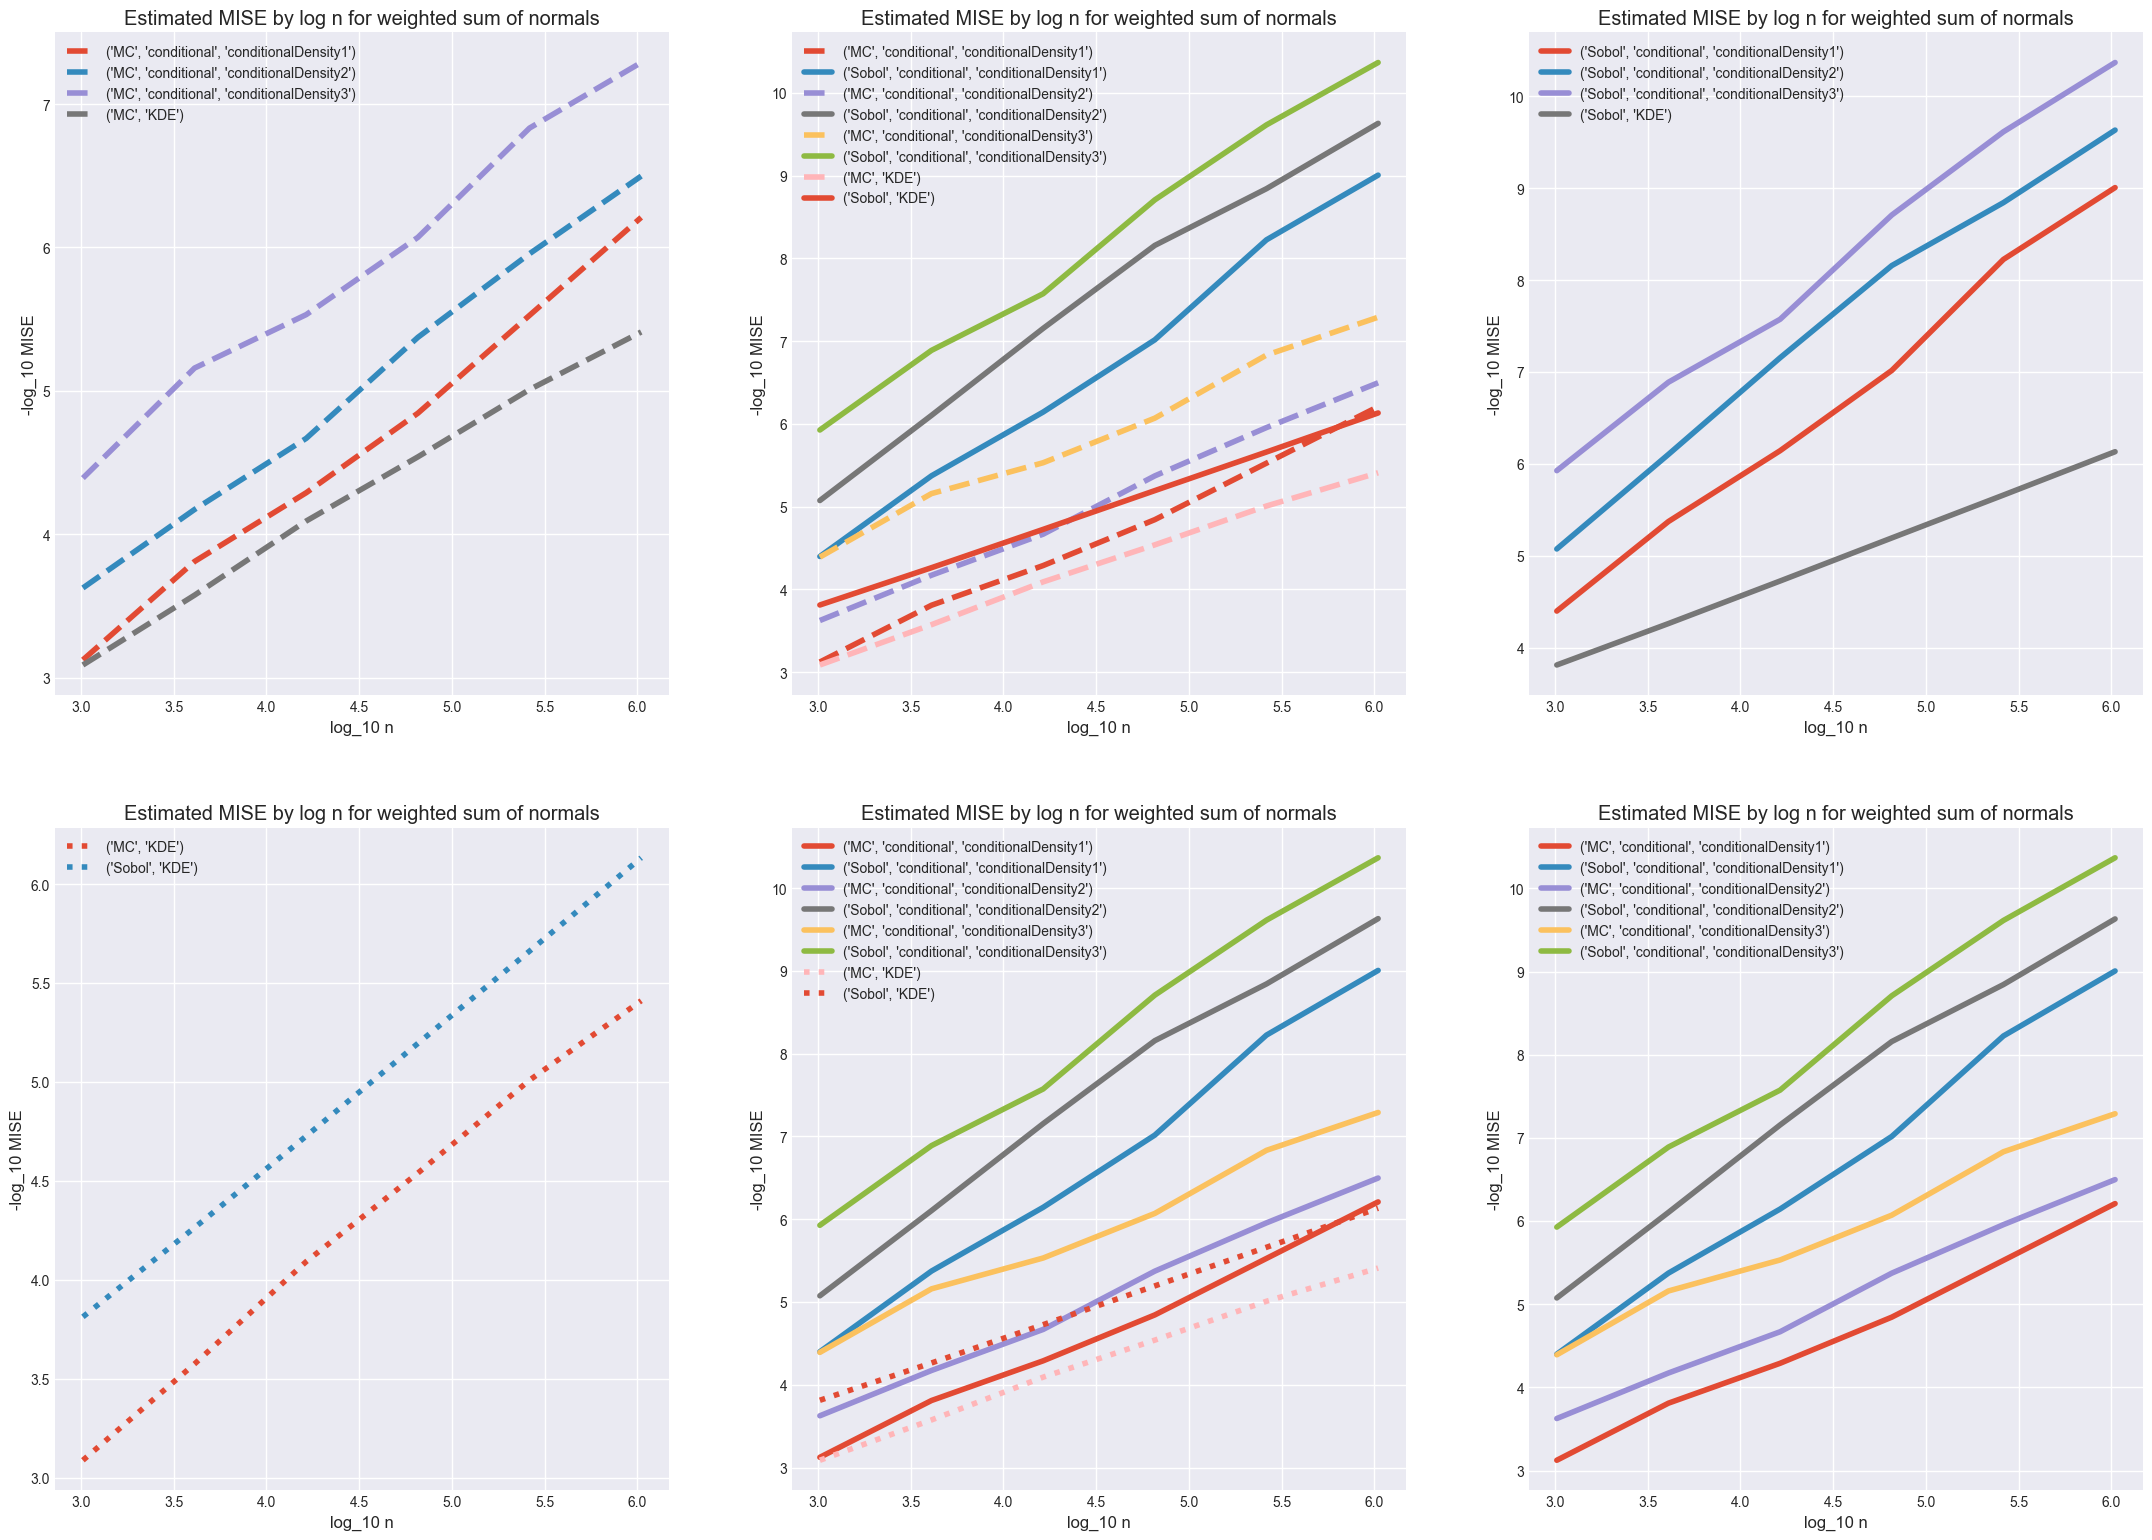

In [63]:
xvals = np.array(range(10, 21, 2)) * np.log10(2)
mpl.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(2, 3, figsize = (24,18))
for key in loadedDb:
    yvals = loadedDb[key][0]
    if key[0] == "MC":
        ax[0][0].plot(xvals, yvals, '--',  label = f"{key}")
        ax[0][1].plot(xvals, yvals, '--' , label = f"{key}",)
    elif key[0] == "Sobol":
        ax[0][2].plot(xvals, yvals, label = f"{key}")
        ax[0][1].plot(xvals, yvals, label = f"{key}")
    if key[1] == 'conditional':
        ax[1][2].plot(xvals, yvals, label = f"{key}")
        ax[1][1].plot(xvals, yvals, label = f"{key}")
    if key[1] == 'KDE':
        ax[1][0].plot(xvals, yvals, ':', label = f"{key}")
        ax[1][1].plot(xvals, yvals, ':', label = f"{key}")
    
for i in range(3):
    for j in range(2):
        ax[j][i].legend()
        ax[j][i].set_title("Estimated MISE by log n for weighted sum of normals")
        ax[j][i].set_xlabel("log_10 n")
        ax[j][i].set_ylabel("-log_10 MISE")

